<a href="https://colab.research.google.com/github/jilliangreene/sta_554_assignments/blob/main/Greene_STA554_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 554 HW 5
Jillian Greene

# Part 1
We discussed the “Five V’s of Big Data”. Give an example of a place where you’ve encountered big
data or a topic you are interested in where big data would arise. Specifically address the five V’s for
the example and whether/how they apply to your example. (5 pts)


*   I am interested in satellite remote sensing which stores complex data as raster images (geotifs). These data are often 3-dimensional with each image having an x and y (lat/long) and multiple layers for the spectral reflectance. This data becomes big very fast as a project covers a spatial area and often has many variables.
*   The obvious V's for this example are **volume** and **velocity**. Single images can be several GBs and in many cases the images are coming in every day! There can also be **variety** in the data type with some being geotifs and some being netCDFs. Other considerations, such as geographic artifacts, cloud interactions, or sun glint, lead to **veracity** in the data values. The data is very **valuable** as it allows for widespread analysis of various earth science topics.



Read about the database we’ll use below (part IV). Give an example for each letter in the CRUD acronym
in the context of this database. (3 pts)

*   **Create**: Create new rows in the `HallOfFame` table when  new players are inducted.
*   **Read**: Retrieve table of all the teams that played in 2018 from the SQL database.
*   **Update**: Update rows when a team wins or loses new games.
*   **Delete**: Delete rows of the teams you're uninterested in.

What is the purpose of the HAVING clause when writing SQL code? (Recall the sqlitetutorial.net tutorial
on the SELECT statement.) (3 pts)

*   The `HAVING` clause can execute aggregate functions on groups that have been selected using `GROUP BY`. e.g. To find the teams that have more than X number of home runs (where home runs may be designated by player in the table rather than teams; this is just an example, I don't know sports stats well enough to say if that's how it usually is!).

# Part 2

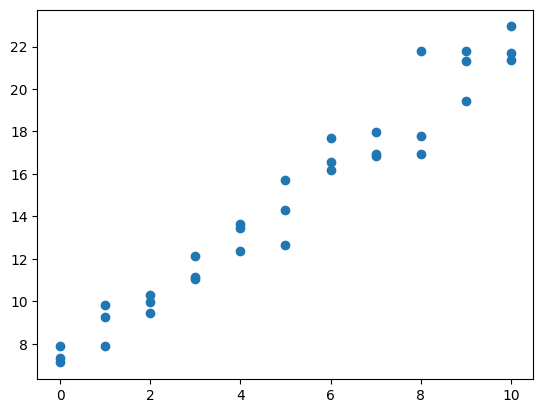

In [2]:
# --- Provided code ---
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

In [5]:
# Use sklearn to estimate slope
import sklearn.linear_model as lm
reg = lm.LinearRegression()
reg.fit(x.reshape(-1,1), y)
print("Slope:", reg.coef_)

Slope: [1.47450564]


In [16]:
# Repeat 5000 times
slopes = []
for i in range(5000):
  print("Iteration: ", i)
  # Regenerate Ys
  y = beta_0 + beta_1*x + rng.standard_normal(n)

  # Calculate slope
  reg = lm.LinearRegression()
  reg.fit(x.reshape(-1,1), y)

  # Add slope to slopes list
  slopes.append(reg.coef_[0])

  # Print length of slopes as check
  print("Length of slopes: ", len(slopes))


Streaming output truncated to the last 5000 lines.
Iteration:  2500
Length of slopes:  2501
Iteration:  2501
Length of slopes:  2502
Iteration:  2502
Length of slopes:  2503
Iteration:  2503
Length of slopes:  2504
Iteration:  2504
Length of slopes:  2505
Iteration:  2505
Length of slopes:  2506
Iteration:  2506
Length of slopes:  2507
Iteration:  2507
Length of slopes:  2508
Iteration:  2508
Length of slopes:  2509
Iteration:  2509
Length of slopes:  2510
Iteration:  2510
Length of slopes:  2511
Iteration:  2511
Length of slopes:  2512
Iteration:  2512
Length of slopes:  2513
Iteration:  2513
Length of slopes:  2514
Iteration:  2514
Length of slopes:  2515
Iteration:  2515
Length of slopes:  2516
Iteration:  2516
Length of slopes:  2517
Iteration:  2517
Length of slopes:  2518
Iteration:  2518
Length of slopes:  2519
Iteration:  2519
Length of slopes:  2520
Iteration:  2520
Length of slopes:  2521
Iteration:  2521
Length of slopes:  2522
Iteration:  2522
Length of slopes:  2523
Iterat

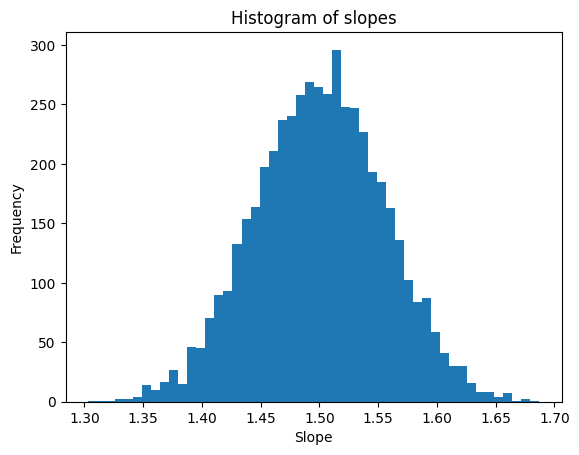

In [18]:
# Histogram of slopes
plt.hist(slopes, bins = 50)
plt.title("Histogram of slopes")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()

In [20]:
#  Probability of observing a sample slope larger than 1.65
# p of simulated values > 1.65
print(np.mean(np.array(slopes) > 1.65))

0.0028


This value means users have a 0.28% chance of the slope calculated being > 1.65, i.e. highly unlikely. This is important for hypothesis testing because it would help to determine whether or not to reject the null hypothesis. In this case, if the hypothesis was that slopes would be > 1.65, this probability output would support rejecting the null hypothesis.

# Part 3